In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/lazyprogrammer/data/data_1d.csv', header=None)

if df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {df.isna().sum().max()} NAs' )

print(df.info())
print(df.head())

There is no NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
           0           1
0  95.724162  197.179636
1  35.757619   67.590670
2  28.816847   60.854133
3  99.958481  196.907397
4  66.809748  125.311129


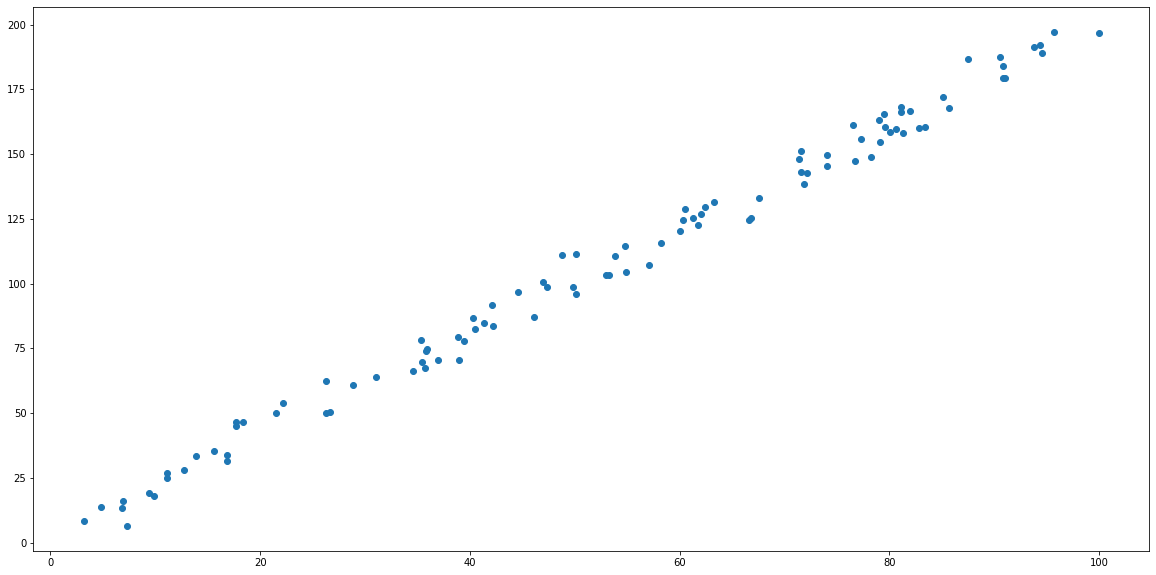

In [ ]:
X = df[0].values
Y = df[1].values

plt.figure(figsize=(20,10))
plt.scatter(X, Y);

In [ ]:
def regress(X, Y, should_plot=False):
  N = len(X)
  s_X = X.sum()
  s_Y = Y.sum()
  s_X2 = X.dot(X)
  s_XY = X.dot(Y)

  denom = N * s_X2 - s_X ** 2
  a = (N * s_XY - s_X * s_Y) / denom
  b = (s_Y * s_X2 - s_X * s_XY) / denom

  Y_hat = a * X + b

  # plot data as scatter and predicted line
  if (should_plot):
    X_sorted = np.sort(X)
    Y_hat_sorted = a * X_sorted + b

    plt.figure(figsize=(20,10))
    plt.scatter(X,Y);
    plt.plot(X_sorted, Y_hat_sorted, color='r')
  
  # R2 calculation
  res_Y_mean = Y - Y.mean()
  res_Y_hat = Y - Y_hat

  R2 = 1 - res_Y_hat.dot(res_Y_hat) / res_Y_mean.dot(res_Y_mean)

  return Y_hat, R2, (a, b)

R2 is: 0.9911838202977805


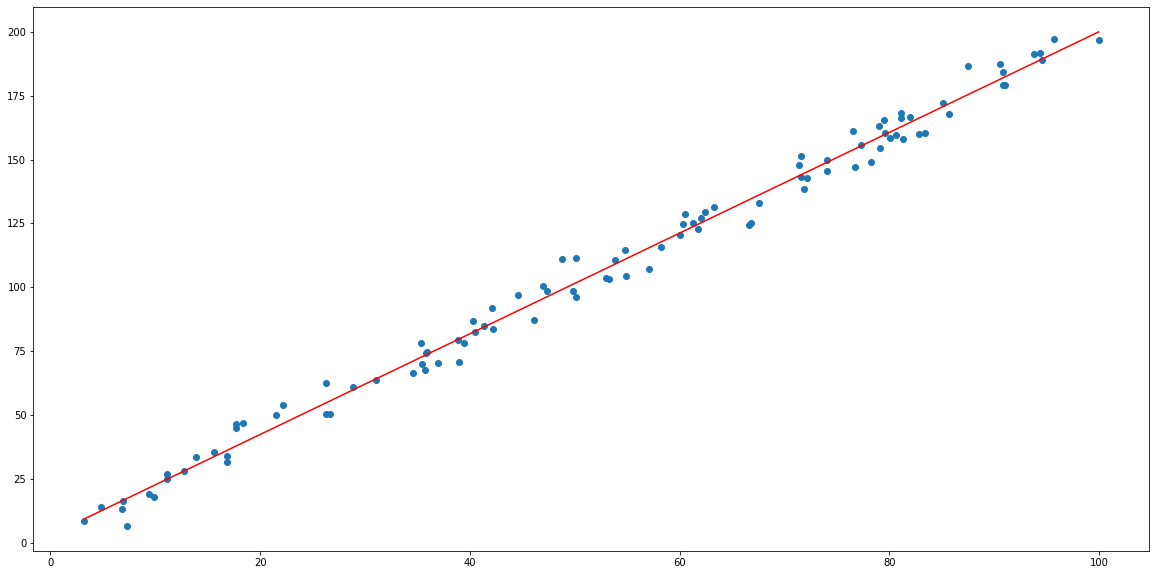

In [ ]:
_, R2, _ = regress(X, Y, True);

print(f'R2 is: {R2}')

# Moore law check

In [ ]:
moore_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LazyProgrammer/Deep_Learning_Prerequisites__Linear_Regression_in_Python/moore.csv', header=None, delimiter='\t')

if moore_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {moore_df.isna().sum().max()} NAs' )

print(moore_df.info())
print(moore_df.head(20))
moore_df.dropna(inplace=True)

There are 7 NAs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       102 non-null    object
 1   1       102 non-null    object
 2   2       102 non-null    object
 3   3       102 non-null    object
 4   4       97 non-null     object
 5   5       95 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB
None
                      0            1  ...          4        5
0            Intel 4004        2,300  ...  10,000 nm   12 mm²
1            Intel 8008        3,500  ...  10,000 nm   14 mm²
2            Intel 8080        4,500  ...   6,000 nm   20 mm²
3         Motorola 6800        4,100  ...   6,000 nm   16 mm²
4              RCA 1802        5,000  ...   5,000 nm   27 mm²
5              TMS 1000        8,000  ...   8,000 nm      NaN
6   MOS Technology 6502     3,510[8]  ...   8,000 nm   21 mm²
7            Intel 8085        6,500  ...   3,000 n

In [ ]:
X = moore_df[2].str.replace(',', '').str.extract(r'^[^0-9]*([\d]*)')[0].astype(int).values
Y = moore_df[1].str.replace(',', '').str.extract(r'^[^0-9]*([\d]*)')[0].astype(int).values

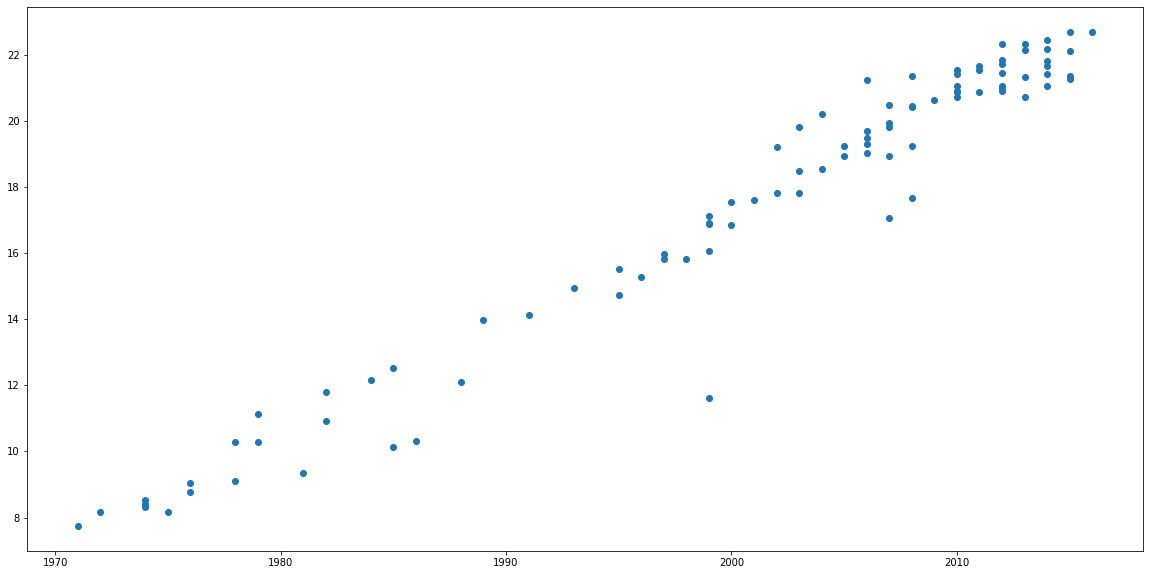

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X, np.log(Y));

R2 is: 0.9575215277510309


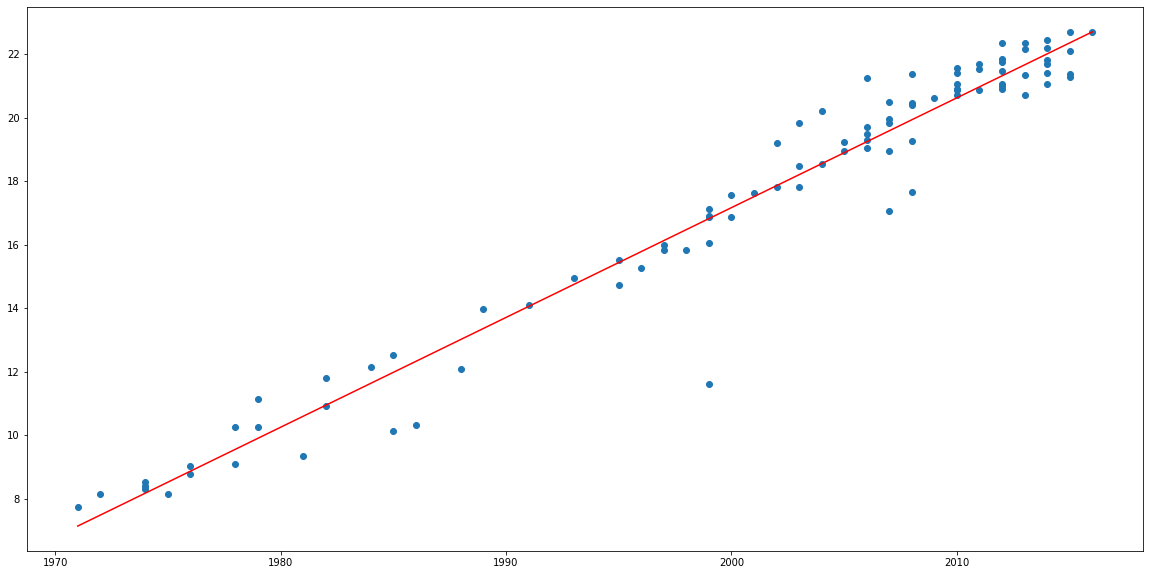

In [ ]:
Year_pred_log, R2, (a, b) = regress(X, np.log(Y), True);

print(f'R2 is: {R2}')

Times to double: 2.0052044022324367


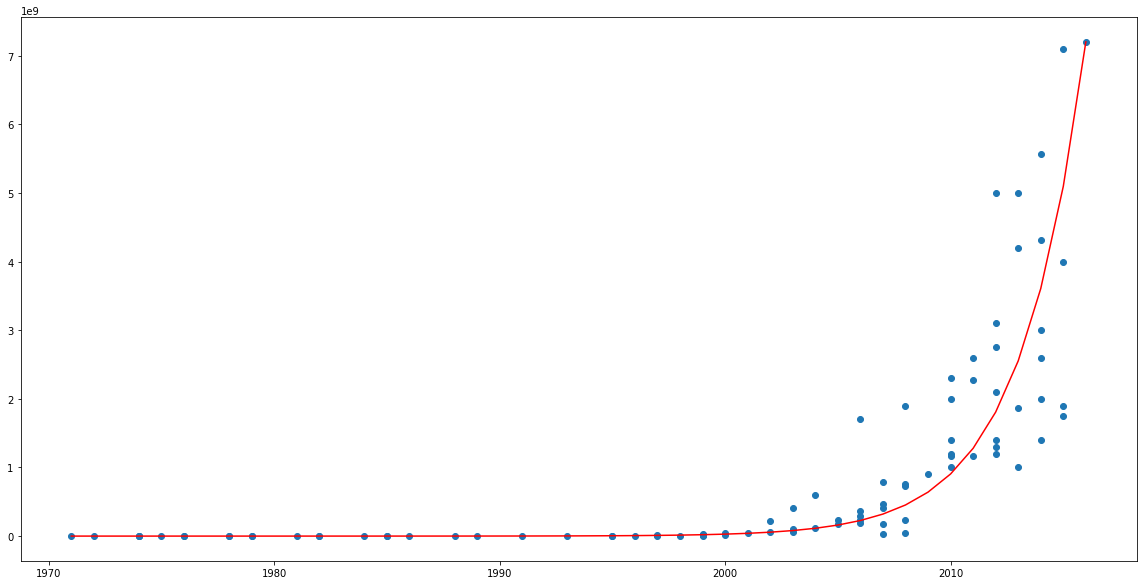

In [ ]:
print(f'Times to double: {np.log(2) / a}')

Year_pred = np.exp(Year_pred_log)

plt.figure(figsize=(20,10))
plt.scatter(X, Y);
plt.plot(X, Year_pred, color='r')